In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Ultra\Downloads\job_market_insights.csv")

In [4]:
print(data.isnull().sum())

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


In [5]:
print(data.columns)

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')


In [6]:
print(data.head())

               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills    Salary_USD  \
0            Medium            High        UX/UI Design  111392.16520   
1            Medium            High           Marketing   93792.56247   
2            Medium            High        UX/UI Design  107170.26310   
3               Low            High  Project Management   93027.95376   
4               Low             Low          JavaScript   87752.92217   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes               

In [8]:
le = LabelEncoder()

In [9]:
data['AI_Adoption_Level_Encoded'] = le.fit_transform(data['AI_Adoption_Level'])
data['Automation_Risk_Encoded'] = le.fit_transform(data['Automation_Risk'])

In [10]:
data[['AI_Adoption_Level', 'AI_Adoption_Level_Encoded', 'Automation_Risk', 'Automation_Risk_Encoded']].head()


,AI_Adoption_Level,AI_Adoption_Level_Encoded,Automation_Risk,Automation_Risk_Encoded
0,Medium,2,High,0
1,Medium,2,High,0
2,Medium,2,High,0
3,Low,1,High,0
4,Low,1,Low,1


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = data['AI_Adoption_Level_Encoded'].values.reshape(-1, 1)
y = data['Automation_Risk_Encoded']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 35.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.27      0.31      0.29        32
           2       0.40      0.71      0.51        35

    accuracy                           0.35       100
   macro avg       0.22      0.34      0.27       100
weighted avg       0.23      0.35      0.27       100

[[ 0 17 16]
 [ 0 10 22]
 [ 0 10 25]]


C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model = DecisionTreeClassifier(min_samples_split=10, random_state=42)
model = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
model = DecisionTreeClassifier(max_features='sqrt', random_state=42)

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt', random_state=42)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.27      0.31      0.29        32
           2       0.40      0.71      0.51        35

    accuracy                           0.35       100
   macro avg       0.22      0.34      0.27       100
weighted avg       0.23      0.35      0.27       100



C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ultra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier()
x = data['AI_Adoption_Level_Encoded'].values.reshape(-1, 1)
y = data['Automation_Risk_Encoded']
clf = clf.fit(x, y)

[Text(0.6, 0.8333333333333334, 'x[0] <= 1.5\ngini = 0.666\nsamples = 500\nvalue = [169, 158, 173]'),
 Text(0.4, 0.5, 'x[0] <= 0.5\ngini = 0.665\nsamples = 321\nvalue = [101, 104, 116]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.663\nsamples = 147\nvalue = [48, 43, 56]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.665\nsamples = 174\nvalue = [53, 61, 60]'),
 Text(0.8, 0.5, 'gini = 0.663\nsamples = 179\nvalue = [68, 54, 57]')]

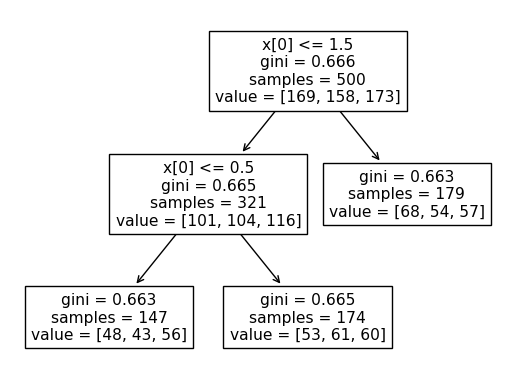

In [28]:
tree.plot_tree(clf)